## 택시운행 데이터 분석

In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv('./data/nyc_data.csv')

# pandas로부터 NumPy로 바꾸는 것은 간단히 .value를 붙여주면 된다. 예를 들어
# Seires는 1차원 NumPy 어레이로 바뀐다.
# DataFrame은 2차원 NumPy로 바뀐다.
pickup = data[['pickup_longitude', 'pickup_latitude']].values
dropoff = data[['dropoff_longitude', 'dropoff_latitude']].values

In [2]:
import numpy as np
x = np.arange(1, 11)
print(x)

[ 1  2  3  4  5  6  7  8  9 10]


In [3]:
# 벡터를 1차원 어레이로 변경하는 방법
# 아래의 (1, -1)에서 -1의 의미는 차원의 수를 알아서 적절히 정하라는 뜻임 
# 아래의 결과를 보면 [ ]와 [[]]의 차이가 벡터와 어레이임
x_row = x.reshape((1, -1))
x_row

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]])

In [4]:
x_col = x[:, np.newaxis]
x_col

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [5]:
# 행렬 곱을 출력하는 함수
np.dot(x_col, x_row)

array([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10],
       [  2,   4,   6,   8,  10,  12,  14,  16,  18,  20],
       [  3,   6,   9,  12,  15,  18,  21,  24,  27,  30],
       [  4,   8,  12,  16,  20,  24,  28,  32,  36,  40],
       [  5,  10,  15,  20,  25,  30,  35,  40,  45,  50],
       [  6,  12,  18,  24,  30,  36,  42,  48,  54,  60],
       [  7,  14,  21,  28,  35,  42,  49,  56,  63,  70],
       [  8,  16,  24,  32,  40,  48,  56,  64,  72,  80],
       [  9,  18,  27,  36,  45,  54,  63,  72,  81,  90],
       [ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]])

In [6]:
np.dot(x_row, x_col)

array([[385]])

In [7]:
# dot()함수와 달리 *는 항목별 곱셈을 수행한다
x_row * 3

array([[ 3,  6,  9, 12, 15, 18, 21, 24, 27, 30]])

In [8]:
x_row * x_row

array([[  1,   4,   9,  16,  25,  36,  49,  64,  81, 100]])

In [9]:
# 이 연산은 매트릭스 곱이 아니라 항목별 곱셈을 수행한다. 그런데 항목의 수가 서로 맞지 않지 때문에 
# broadcasting (자동확장)을 하여 아래와 같은 결과가 나오는 것임을 주의해야 한다
x_row * x_col

array([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10],
       [  2,   4,   6,   8,  10,  12,  14,  16,  18,  20],
       [  3,   6,   9,  12,  15,  18,  21,  24,  27,  30],
       [  4,   8,  12,  16,  20,  24,  28,  32,  36,  40],
       [  5,  10,  15,  20,  25,  30,  35,  40,  45,  50],
       [  6,  12,  18,  24,  30,  36,  42,  48,  54,  60],
       [  7,  14,  21,  28,  35,  42,  49,  56,  63,  70],
       [  8,  16,  24,  32,  40,  48,  56,  64,  72,  80],
       [  9,  18,  27,  36,  45,  54,  63,  72,  81,  90],
       [ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]])

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib; matplotlib.rcParams['savefig.dpi'] = 144

# 데이터 읽기
data = pd.read_csv('./data/nyc_data.csv',
                   parse_dates=['pickup_datetime', 'dropoff_datetime'])

pickup = data[['pickup_longitude', 'pickup_latitude']].values # 승차 위경도 값을 pickup에 저장
dropoff = data[['dropoff_longitude', 'dropoff_latitude']].values # 하차 위경도 값을 dropoff에 저장
pickup

array([[-73.955925,  40.781887],
       [-74.005501,  40.745735],
       [-73.969955,  40.79977 ],
       ..., 
       [-73.993492,  40.729347],
       [-73.978477,  40.772945],
       [-73.987206,  40.750568]])

In [11]:
# 하차 경도
lon = dropoff[:, 0]
lon

array([-73.963181, -73.964943, -73.954567, ..., -74.013725, -73.963814,
       -73.970909])

In [12]:
# 하차 위도
lat = dropoff[:, 1]
lat

array([ 40.777832,  40.755722,  40.787392, ...,  40.702332,  40.773922,
        40.795815])

In [35]:
## NumPy 어레이 연산
lon_min, lon_max = (-73.98470, -73.98165)
lat_min, lat_max = ( 40.76582,  40.76729)

in_lon = (lon_min <= lon) & (lon <= lon_max)
in_lon

array([False, False, False, ..., False, False, False], dtype=bool)

In [36]:
in_lon.sum()

61572

In [15]:
in_lat = (lat_min <= lat) & (lat <= lat_max)

in_lonlat = in_lon & in_lat
in_lonlat.sum()

1991

In [18]:
# 요소들 중 0이 아닌 값들의 index를 반환하는 함수
np.nonzero(in_lonlat)[0]

array([    33,   1989,   2354, ..., 845273, 845827, 845989])

In [28]:
# T는 전치(transpose)를 나타낸다
lon1, lat1 = dropoff.T
print(lon1)
print(lat1)

[-73.963181 -73.964943 -73.954567 ..., -74.013725 -73.963814 -73.970909]
[ 40.777832  40.755722  40.787392 ...,  40.702332  40.773922  40.795815]


In [33]:
# 직선거리 구하기
EARTH_R = 6372.8
def geo_distance(lon0, lat0, lon1, lat1):
    lat0 = np.radians(lat0)
    lon0 = np.radians(lon0)
    lat1 = np.radians(lat1)
    lon1 = np.radians(lon1)
    dlon = lon0 - lon1
    y = np.sqrt(
        (np.cos(lat1) * np.sin(dlon)) ** 2
         + (np.cos(lat0) * np.sin(lat1)
         - np.sin(lat0) * np.cos(lat1) * np.cos(dlon)) ** 2)
    x = np.sin(lat0) * np.sin(lat1) + \
        np.cos(lat0) * np.cos(lat1) * np.cos(dlon)
    c = np.arctan2(y, x)
    return EARTH_R * c

In [34]:
distances = geo_distance(lon, lat, lon1, lat1)
distances

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

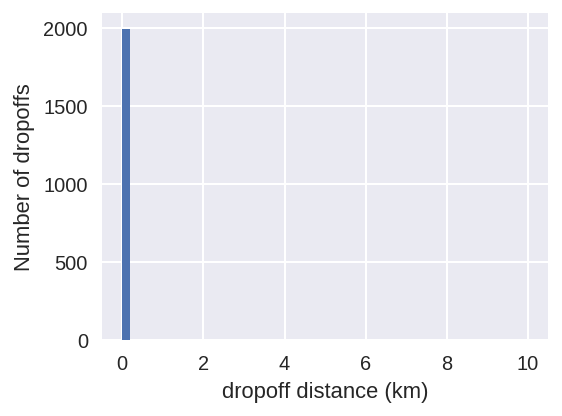

In [27]:
plt.clf()
plt.figure(figsize=(4, 3))
plt.hist(distances[in_lonlat], np.linspace(0., 10., 50))
plt.xlabel('dropoff distance (km)')
plt.ylabel('Number of dropoffs')
plt.show()

In [20]:
evening = (data.pickup_datetime.dt.hour >= 19).values
n = np.sum(evening)
n

242818

In [17]:
# pandas는 필터링, 그루핑 등 데이터를 다루는데 편리하고, NumPy는 매트릭스 연산을 빠르게 처리해 주는 장점이 있다. 
# 즉 처음에는 pandas로 데이터를 가공하고, 계산을 할 때 NumPy로 바꾸는 것이 편리하다.

weights = np.zeros(2 * n)

weights[:n] = -1
weights[n:] = +1

points = np.r_[pickup[evening],
               dropoff[evening]]
points.shape

(485636, 2)

In [36]:
# 지리 좌표를 픽셀 좌표로 변환
def lat_lon_to_pixels(lat, lon):
    lat_rad = lat * np.pi / 180.0
    lat_rad = np.log(np.tan((lat_rad + np.pi / 2.0) / 2.0))
    x = 100 * (lon + 180.0) / 360.0
    y = 100 * (lat_rad - np.pi) / (2.0 * np.pi)
    return (x, y)

lon, lat = points.T
x, y = lat_lon_to_pixels(lat, lon)

lon_min, lat_min = -74.0214, 40.6978
lon_max, lat_max = -73.9524, 40.7982

x_min, y_min = lat_lon_to_pixels(lat_min, lon_min)
x_max, y_max = lat_lon_to_pixels(lat_max, lon_max)

bin = .00003
bins_x = np.arange(x_min, x_max, bin)
bins_y = np.arange(y_min, y_max, bin)

grid, _, _ = np.histogram2d(y, x, weights=weights,
                            bins=(bins_y, bins_x))

density = 1. / (1. + np.exp(-.5 * grid))

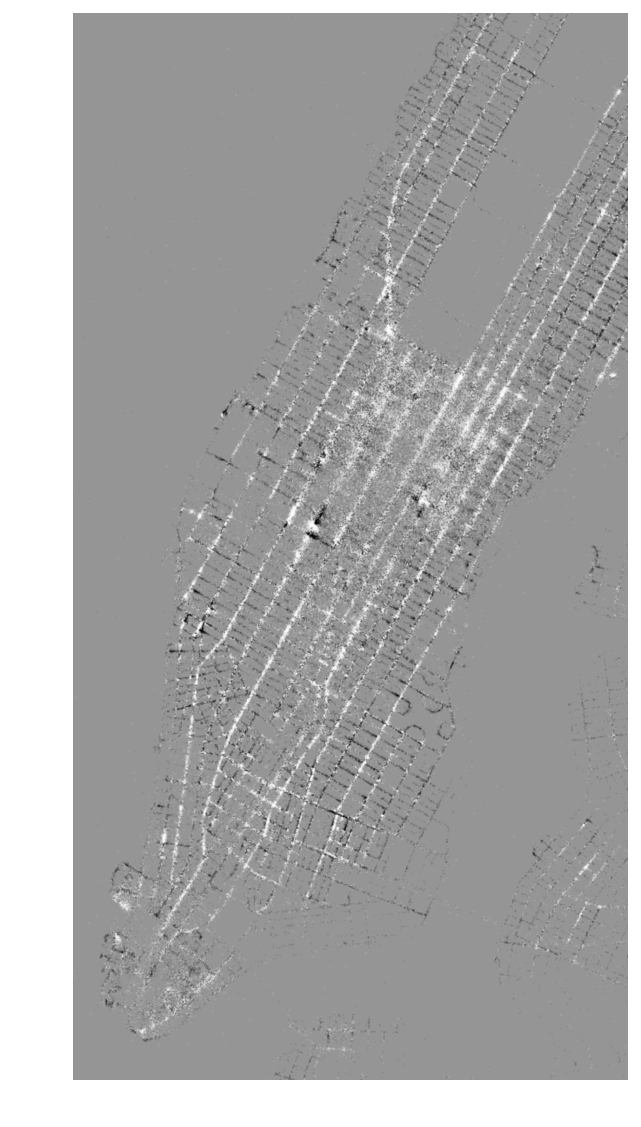

In [37]:
# 밀도 그래프 출력
plt.clf()
plt.figure(figsize=(8, 8))
plt.imshow(density,
           origin='lower',
           interpolation='bicubic'
           )
plt.axis('off')
plt.tight_layout()
plt.show()